# Capstone Project Notebook

Approach

Collect City data from data set
Use FourSquare API to find all neighbourhood venues
Visualize the Ranking of neighbourhoods

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import geocoder

Reading the Dataset and ordering it according to the place selected

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_I = df[df['Country Code'] == 1]
df_D = df_I[df_I['City']=='New Delhi']
df_D.reset_index(drop=True,inplace=True)
df_D.head()


Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [4]:
df_r = df_D[df_D.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_r = df_r[df_r['Aggregate rating']!= 0.0]
df_r.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

Map to show Restaurant clusters

In [6]:
n_r = folium.Map(height=600,location=[28.52, 77.25], zoom_start=12)

X = df_r['Latitude']
Y = df_r['Longitude']
Z = np.stack((X,Y),axis=1)

kmeans = KMeans(n_clusters=5,random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red','green','blue','purple','orange']
df_r['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_r['Latitude'], df_r['Longitude'], df_r['Locality'], df_r['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(n_r)  

n_r

Best Restaurants in Delhi

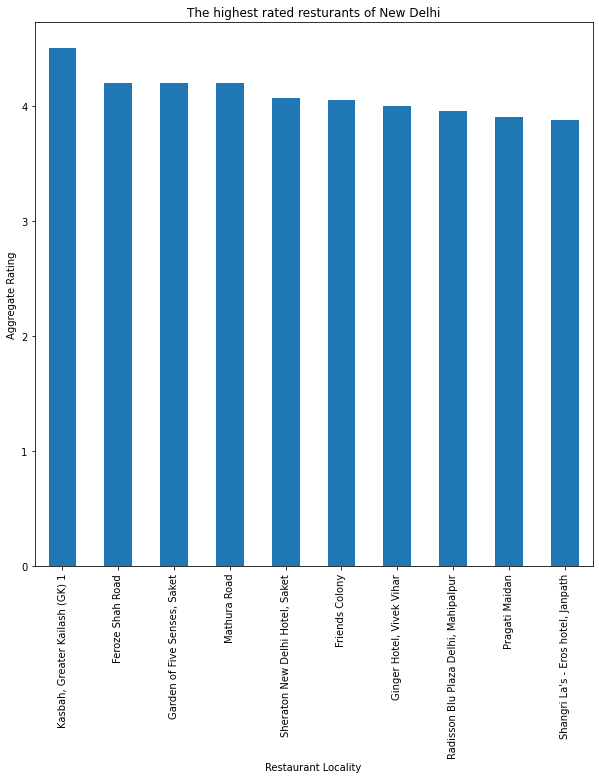

In [7]:
plt.figure(figsize=(10,10))

plt.title('The highest rated resturants of New Delhi')

df_r.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind = 'bar')

plt.xlabel("Restaurant Locality")

plt.ylabel("Aggregate Rating")

plt.show()

The best restarants are available in Kesbah, Greater Kailash area.

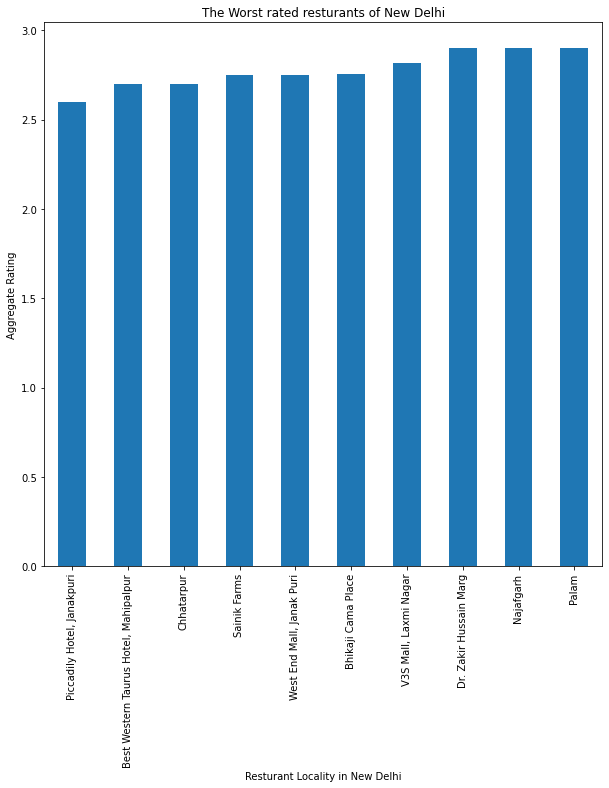

In [8]:
plt.figure(figsize=(10,10))

plt.title('The Worst rated resturants of New Delhi')
#On x-axis

#giving a bar plot

df_r.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpur

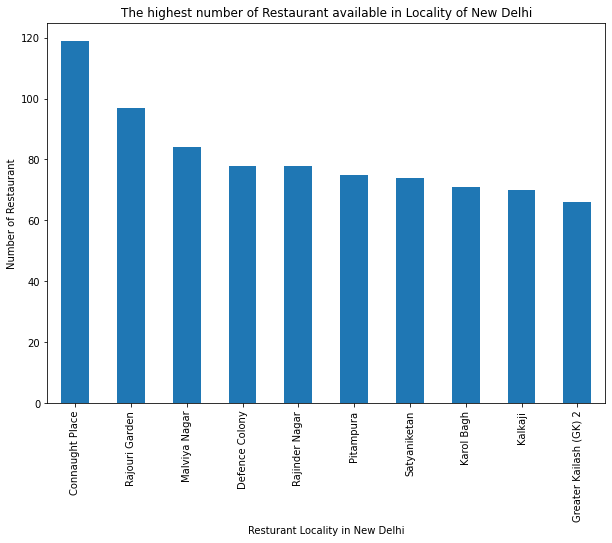

In [9]:
plt.figure(figsize=(10,7))
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_r.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Connaught Place is the best places for edible person to stay there.

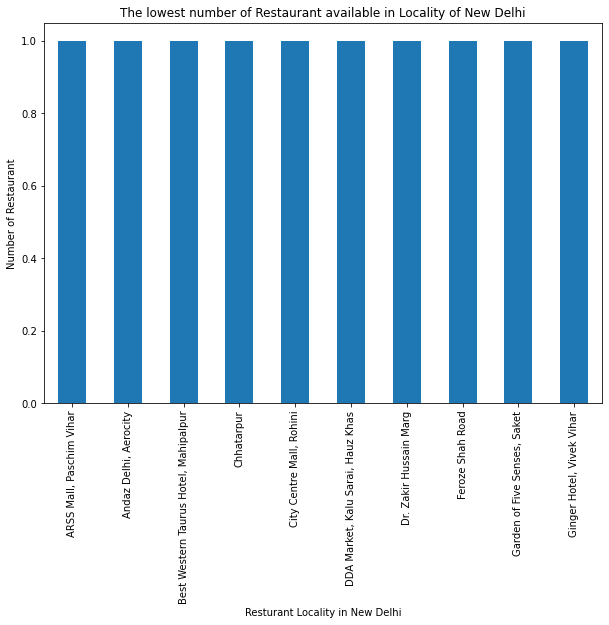

In [10]:
plt.figure(figsize=(10,7))
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_r.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

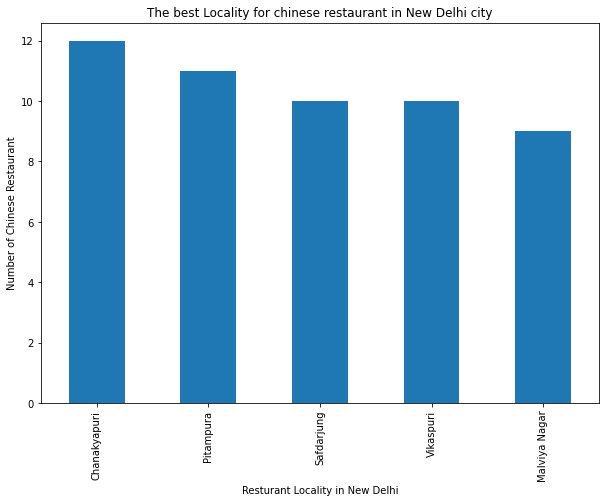

In [11]:
plt.figure(figsize=(10,7))
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_r[df_r['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Chanakyapuri is the best place for Chinese restaurant.

Grouping the data based on Lacality

In [12]:
df_Res_Loc =  df_r.groupby('Locality').count()['Restaurant Name'].to_frame()

df_Res_rating= df_r.groupby('Locality')['Aggregate rating'].mean().to_frame()

d_Cuisines = df_r.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()

d_R = df_r.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()

d_V = df_r.groupby(['Locality'])['Votes'].sum().to_frame()

d_Lat = df_r.groupby('Locality').mean()['Latitude'].to_frame()

d_Lng = df_r.groupby('Locality').mean()['Longitude'].to_frame()

df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [13]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [14]:


## Define Foursquare Credentials and Version
CLIENT_ID = '5U2YJDESW5D3EIT4CWHXBMUMJELBJHL2ESSGUMISE5ZX0LK2' # Foursquare ID
CLIENT_SECRET = 'E3JIP4QTMG4FARDJ3WSXDGWCLGBYM4MZB1HNRR1WFDWRUOPO'
 # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: 5U2YJDESW5D3EIT4CWHXBMUMJELBJHL2ESSGUMISE5ZX0LK2
CLIENT_SECRET:E3JIP4QTMG4FARDJ3WSXDGWCLGBYM4MZB1HNRR1WFDWRUOPO


Function to repeat the same process to all the Locality in New Delhi

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# find the venues in all New Delhi Locality
nd_v = getNearbyVenues(names=df_final['Locality'],latitudes = df_final['Lat'],longitudes=df_final['Lng'])


ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [17]:
nd_v.groupby('Locality').count()


Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                       10                  10     10   
Adchini                                         6                   6      6   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          29                  29     29   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       27                  27     27   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                    10               10   
Adchini                                      6                6   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       29               29   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    27               27   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                    10  
Adchini                                      6  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       29  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    27  

[236 rows x 6 columns]

In [18]:
print(len(nd_v['Venue Category'].unique()))

208


In [19]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(nd_v[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = nd_v['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 209 columns]

In [23]:
nd_g = new_Delhi_onehot.groupby('Locality').mean().reset_index()
nd_g

In [22]:
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


Locality  ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.1           0.100000   
1                           Adchini  0.0           0.000000   
2     Aditya Mega Mall, Karkardooma  0.0           0.000000   
3                          Aerocity  0.0           0.000000   
4     Aggarwal City Mall, Pitampura  0.0           0.000000   
..                              ...  ...                ...   
231  West Gate Mall, Rajouri Garden  0.0           0.000000   
232                West Patel Nagar  0.0           0.000000   
233           Worldmark 1, Aerocity  0.0           0.034483   
234                     Yusuf Sarai  0.0           0.000000   
235        ibis New Delhi, Aerocity  0.0           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
231                0.0                 0.0      0.0                 0.0   
232                0.0                 0.0      0.0                 0.0   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
231        0.000000              0.0          0.000000  ...    0.0   
232        0.000000              0.0          0.000000  ...    0.0   
233        0.000000              0.0          0.000000  ...    0.0   
234        0.000000              0.0          0.000000  ...    0.0   
235        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
231       0.000000                 0.0               0.0   
232       0.000000                 0.0               0.0   
233       0.034483                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.037037                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
231                            0.0                    0.0         0.0   
232                            0.0                    0.0         0.0   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235 

In [24]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = nd_g['Locality']

for ind in np.arange(nd_g.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nd_g.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura      Department Store   
..                              ...                   ...   
231  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
232                West Patel Nagar           Pizza Place   
233           Worldmark 1, Aerocity                 Hotel   
234                     Yusuf Sarai     Indian Restaurant   
235        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM                Market           Coffee Shop   
1       Indian Restaurant                   Pub      Parsi Restaurant   
2               Multiplex         Shopping Mall     Indian Restaurant   
3        Airport Terminal  Fast Food Restaurant           Coffee Shop   
4       Indian Restaurant       Bed & Breakfast    Chinese Restaurant   
..                    ...                   ...                   ...   
231         Shopping Mall                  Café           Snack Place   
232     Electronics Store   Sporting Goods Shop                  Park   
233       Bed & Breakfast           Coffee Shop     Indian Restaurant   
234           Coffee Shop          Dessert Shop      Asian Restaurant   
235     Indian Restaurant           Coffee Shop    Punjabi Restaurant   

    5th Most Common Venue           6th Most Common Venue  \
0      Chinese Restaurant                  Sandwich Place   
1                     ATM  Multicuisine Indian Restaurant   
2                   Hotel                            Café   
3          Airport Lounge             Rental Car Location   
4             Pizza Place                        Pharmacy   
..                    ...                             ...   
231    Chinese Restaurant                      Hookah Bar   
232         Metro Station                Pedestrian Plaza   
233                Bakery                       Hotel Bar   
234   Japanese Restaurant                  Ice Cream Shop   
235  Gym / Fitness Center                      Restaurant   

              7th Most Common Venue    8th Most Common Venue  \
0    Multicuisine Indian Restaurant              Pizza Place   
1                         Multiplex                   Museum   
2           North Indian Restaurant                   Museum   
3                         Nightclub  North Indian Restaurant   
4           North Indian Restaurant                Multiplex   
..                              ...                      ...   
231                       Multiplex               Restaurant   
232                Parsi Restaurant                 Pharmacy   
233              Punjabi Restaurant     Gym / Fitness Center   
234                           Hotel                     Park   
235                          Bakery                      Spa   

              9th Most Common Venue 10th Most Common Venue  
0                 Accessories Store     Light Rail Station  
1                       Music Store            Music Venue  
2                       Music Store            Music Venue  
3                    Nightlife Spot                    ATM  
4                            Museum            Music Store  
..                              ...                    ...  
231             American Restaurant      Indian Restaurant  
232  Multicuisine Indian Restaurant              Multiplex  
233                          Buffet          Train Station  
234                            Café         Breakfast Spot  
235                       Hotel Bar        Bed & Breakfast  

[236 rows x 11 columns]

In [25]:
# Cluster Locality
# Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = nd_g.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(236,)

In [27]:
# add clustering labels
New_Delhi_merged = df_final.head(236)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-27-50fc93be4bde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               2   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               1   
3                         Average           59               0   
4                         Average          126               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place             Multiplex         Shopping Mall   
3                 Hotel      Airport Terminal  Fast Food Restaurant   
4      Department Store     Indian Restaurant       Bed & Breakfast   

  4th Most Common Venue 5th Most Common Venue           6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant                  Sandwich Place   
1      Parsi Restaurant                   ATM  Multicuisine Indian Restaurant   
2     Indian Restaurant                 Hotel                            Café   
3           Coffee Shop        Airport Lounge             Rental Car Location   
4    Chinese Restaurant           Pizza Place                        Pharmacy   

            7th Most Common Venue    8th Most Common Venue  \
0  Multicuisine Indian Restaurant              Pizza Place   
1                       Multiplex                   Museum   
2         North Indian Restaurant                   Museum   
3                       Nightclub  North Indian Restaurant   
4         North Indian Restaurant                Multiplex   

  9th Most Common Venue 10th Most Common Venue  
0     Accessories Store     Light Rail Station  
1           Music Store            Music Venue  
2           Music Store            Music Venue  
3        Nightlife Spot                    ATM  
4                Museum            Music Store

In [30]:
# create final map
map_clusters = folium.Map(height=600,location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]

colors = ['red', 'green', 'blue', 'purple','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
## Examine one of the 5 clusters

## this is the fourth cluster-most recommended for cafe and pizzas

New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]


Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
22   28.654105    3.085714                   Average           80   
104  28.656263    3.097619             Average, Good          965   
136  28.658244    3.240000             Average, Good          567   
179  28.572117    3.871429  Average, Good, Very Good         1871   
217  28.535183    3.066667                   Average           37   
228  28.596073    3.052941             Average, Good          305   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 3  Fast Food Restaurant           Pizza Place   
22                3           Pizza Place                   Gym   
104               3           Pizza Place  Fast Food Restaurant   
136               3         Metro Station   Fried Chicken Joint   
179               3             Multiplex           Coffee Shop   
217               3                 Hotel     Indian Restaurant   
228               3                   NaN                   NaN   

    3rd Most Common Venue        4th Most Common Venue  \
5          Sandwich Place                    Multiplex   
22   Fast Food Restaurant      North Indian Restaurant   
104                  Park  Northeast Indian Restaurant   
136  Fast Food Restaurant  Northeast Indian Restaurant   
179     Convenience Store              Thai Restaurant   
217                   ATM      North Indian Restaurant   
228                   NaN                          NaN   

              5th Most Common Venue           6th Most Common Venue  \
5              Gym / Fitness Center                      Restaurant   
22   Multicuisine Indian Restaurant                       Multiplex   
104  Multicuisine Indian Restaurant                       Multiplex   
136                       Multiplex                          Museum   
179                Asian Restaurant                      Restaurant   
217              Mughlai Restaurant  Multicuisine Indian Restaurant   
228                             NaN                             NaN   

              7th Most Common Venue    8th Most Common Venue  \
5    Multicuisine Indian Restaurant                   Museum   
22                           Museum              Music Store   
104                          Museum              Music Store   
136                     Music Store              Music Venue   
179                            Park  Comfort Food Restaurant   
217                       Multiplex                   Museum   
228                             NaN                      NaN   

    9th Most Common Venue 10th Most Common Venue  
5             Music Store            Music Venue  
22            Music Venue          National Park  
104           Music Venue          National Park  
136         National Park           Neighborhood  
179         Shopping Mall      Electronics Store  
217           Music Store            Music Venue  
228                   NaN                    NaN


# Conclusion

Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
Pancsheel park, Nehru place have the best Chinese Resturant.
Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
    Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. 
Cluster according toh map
Cluster 1: It is most recommended for Indian Restaurants. 
Cluster 2: It is most recommended for Hotels and nightclub. 
Cluster 3 and Cluster 5: It is most recommended for Fast food. 
Cluster 4: It is most recommended for the cafe and pizza.

